# Metadata

```yaml
Course:  DS 5100
Module:  09 Python Packages
Topic:   Packages, Modules, and Imports 
Author:  R.C. Alvarado
Date:    10 July 2022
```
Source: [Making a Python Package
](https://python-packaging-tutorial.readthedocs.io/en/latest/setup_py.html)

# Packages, modules, and imports

# Modules

In Python, a **module** can be a file containing Python definitions and statements. 

The file name is the module name with the suffix `.py` appended. 

Inside the file, the module’s name is available as the value of the global variable `__name__`. 

For instance, let's say we have a file called `fibo.py` with the following code:

```python
# Fibonacci numbers module

def fib(n):    # write Fibonacci series up to n
    a, b = 0, 1
    while a < n:
        print(a, end=' ')
        a, b = b, a+b
    print()

def fib2(n):   # return Fibonacci series up to n
    a, b = 0, 1
    result = []
    while a < n:
        result.append(a)
        a, b = b, a+b
    return result
```

We can import it into this notebook and get it's filename.

In [24]:
import fibo

In [25]:
fibo.__name__

'fibo'

And here is how we interact with the file as a module:

In [26]:
fibo.fib(1000)

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 


In [27]:
fibo.fib2(100)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

# Aside on Namespaces

You can see that a python **module** acts as a single **namespace**, which is used to organize a collection of values:

-   functions
-   constants
-   class definitions
-   really any old value

A namespace is a collection of currently defined names being used by a program.

You can think of its as a Python dictionary in which the keys are the object names and the values are the objects themselves.

It's a way of making sure variable and function names do not collide or get confused with each other.

Python has four namespaces:
* **Built-In**: Contains the names of all of Python’s built-in objects. See `dir(__builtins__)`
* **Global**: Contains any names defined at the level of the main program. A global namespace is also created for any module that your program imports. See `globals()`.
* **Enclosing**: The namespaces of a function for any functions defined within that function. 
* **Local**: Contains any names defined in a function.

Namespaces are related to **scope**. To know the context in which a name has meaning, Python searches namespaces from the inside out.

    L -> E -> G -> B

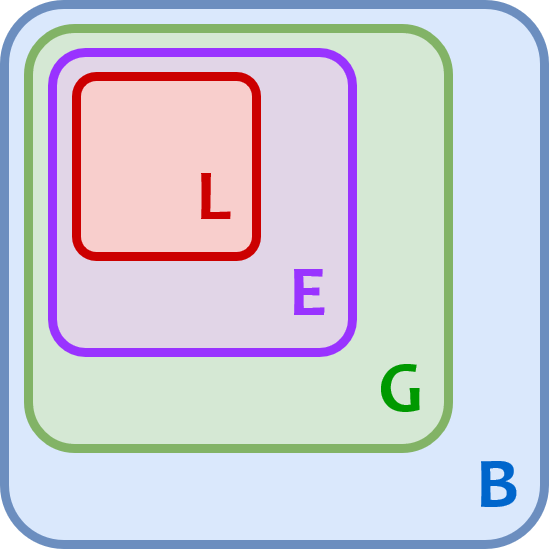

See `M14-01b-Globals.ipynb` for a demo.

See [Namespaces and Scope in Python (Real Python)](https://realpython.com/python-namespaces-scope/) for a good primer.

In [34]:
# dir()

In [35]:
# dir(__builtins__)

In [38]:
# locals()

In [39]:
# globals()

In [75]:
def foo():
    x = y = z = 1
    print(locals())
    
    def bar():
        a = b = c = 2
        print(locals())
        
    bar()

In [76]:
foo()

{'x': 1, 'y': 1, 'z': 1}
{'a': 2, 'b': 2, 'c': 2}


# Packages

**A package is a directory** that may contain other modules.

For a directory to be a package, it must contain an `__init__.py` file.

The `__init__.py` can be **totally empty** or it can have some Python code in it. We'll see why you would do that below.

It it will contain other python files or other package directories, too.

Here an example directory structure of a package that contains a package:

```bash
# EXAMPLE 1 
a_package_dir
    __init__.py
    module_a.py
    a_sub_package_dir
        __init__.py
        module_b.py
```

At a minimum, all you need to do have is this:

```bash
# EXAMPLE 2
a_package_dir
    __init__.py
    module_a.py
```
However, **ideally**, if you want to have your package **installed**, you'd do this:

```bash
# EXAMPLE 3
src
    a_package_dir
        __init__.py
        module_a.py
tests
    ...
setup.py # Or pyproject.toml 
```

Note that we put our package in the source directory `src` and added the setup file `setup.py`, with the note that it can replaced by `pyproject.toml`.

# Packages and Namespaces

Packages structure Python’s **module namespace** by setting up **dotted module names.** 

For example, the module name `A.B` designates a submodule named `B` in a package named `A`. 

The use of dotted module names saves the authors of multi-module packages like NumPy or Pillow from having to worry about each other’s module names.

# Importing Packages and Modules

So, given the above directory and file structure, within a Python file you can:

```
import a_package
````

This will run any code in `a_package/__init__.py`.

So, any variable or function names defined in the `__init__.py` will be available like this:

```
a_package.a_name
```

However, no **modules** will be imported unless explicity commanded to. 

For example:

```
a_package.module_a
```

will not be imported. 

To get modules, you need to explicitly import them:

```
import a_package.module_a
```

You will have noticed this in working with well-known libraries (bundles of packages) like Scikit Learn. 

# The module search path

How does Python know where to find modules?

The interpreter keeps a list of all the places that it looks for modules or packages when you do an import. It is stored in the `sys` module.

```python
import sys
for p in sys.path:
    print p
```

You can edit that list to add or remove paths to let python find
modules on a new place.

```python
sys.path.append(some_local_dir)
```

Remember that every module has a `__file__` name that points to the path it lives in. 

This lets you add paths relative to where you are, etc.

```python
sys.path.append(f"{__file__}/local_module_directory")
```

# More Info

There is, of course, a lot more to this topic than what's covered here.

We've covered what you need to know to get started.

See [the official docs on modules](https://docs.python.org/3/tutorial/modules.html#packages) for more depth.